# Description

Tests whether the distribution of pvalues generated by CCC is the expected one (uniform).

# Modules loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from ccc import conf

# Settings

# Paths

In [2]:
OUTPUT_DIR = conf.RESULTS_DIR / "ccc_null-pvalues"
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
OUTPUT_DIR

PosixPath('/opt/data/results/ccc_null-pvalues')

# Load CCC values and pvalues

In [4]:
output_file = OUTPUT_DIR / "cm_values.npy"
cm_values = np.load(output_file)
display(cm_values.shape)

(4950,)

In [5]:
output_file = OUTPUT_DIR / "cm_pvalues.npy"
cm_pvalues = np.load(output_file)
display(cm_pvalues.shape)

(4950,)

In [6]:
n_perms = cm_pvalues.shape[0]
min_pvalue_resolution = (0 + 1) / (n_perms + 1)
display(min_pvalue_resolution)

0.00020197939810139365

# Plots

Text(0, 0.5, 'Frequency')

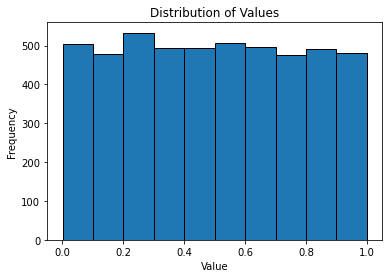

In [7]:
plt.hist(cm_pvalues, bins=10, edgecolor="k")  # Adjust the number of bins as needed
plt.title("Distribution of Values")
plt.xlabel("Value")
plt.ylabel("Frequency")

Text(0, 0.5, 'Density')

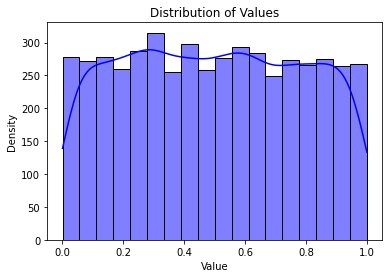

In [8]:
sns.histplot(cm_pvalues, kde=True, color="blue")
plt.title("Distribution of Values")
plt.xlabel("Value")
plt.ylabel("Density")

# KS

In [9]:
stats.kstest(
    cm_pvalues,
    stats.uniform.cdf,
    args=(min_pvalue_resolution, 1 - min_pvalue_resolution),
)

KstestResult(statistic=0.012915569279205674, pvalue=0.37765297395498454)